# DIABETES DATASET
## FROM KAGGLE

### This dataset is originally from the N. Inst. of Diabetes & Diges. & Kidney Dis.

## About Dataset

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Columns
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

Number of Instances: 768  <br>
Number of Attributes: 8 plus class  <br>
For Each Attribute: (all numeric-valued)  <br>
Missing Attribute Values: Yes  <br>
Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")


### Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases <br>
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader <br>
Applied Physics Laboratory <br>
The Johns Hopkins University <br>
Johns Hopkins Road <br>
Laurel, MD 20707 <br>
(301) 953-6231

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Data

In [4]:
db = pd.read_csv("C:\\Users\\DELL\\Desktop\\diabetes mew.csv")

### Data Overview

In [5]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
print(f"Diabetes data set dimensions : {(db.shape)}")

Diabetes data set dimensions : (768, 9)


### Data Cleaning


In [13]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
db.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Observation <br>
We notice that minimum value for columns such as Glucose, BP, Insulin, BMI are 0 which is not possible. <br> Hence, these must be missing values which are encoded as 0 We can use imputation techniques to deal with these.

In [16]:
missing_data=db.loc[:,'Glucose':'BMI']
missing_data.replace(0,np.nan,inplace=True)
db.loc[:,'Glucose':'BMI']=missing_data

In [18]:
db.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Lets observe these missing values more closely and find out if their is any relation

In [26]:
#!pip install missingno
import missingno as msno

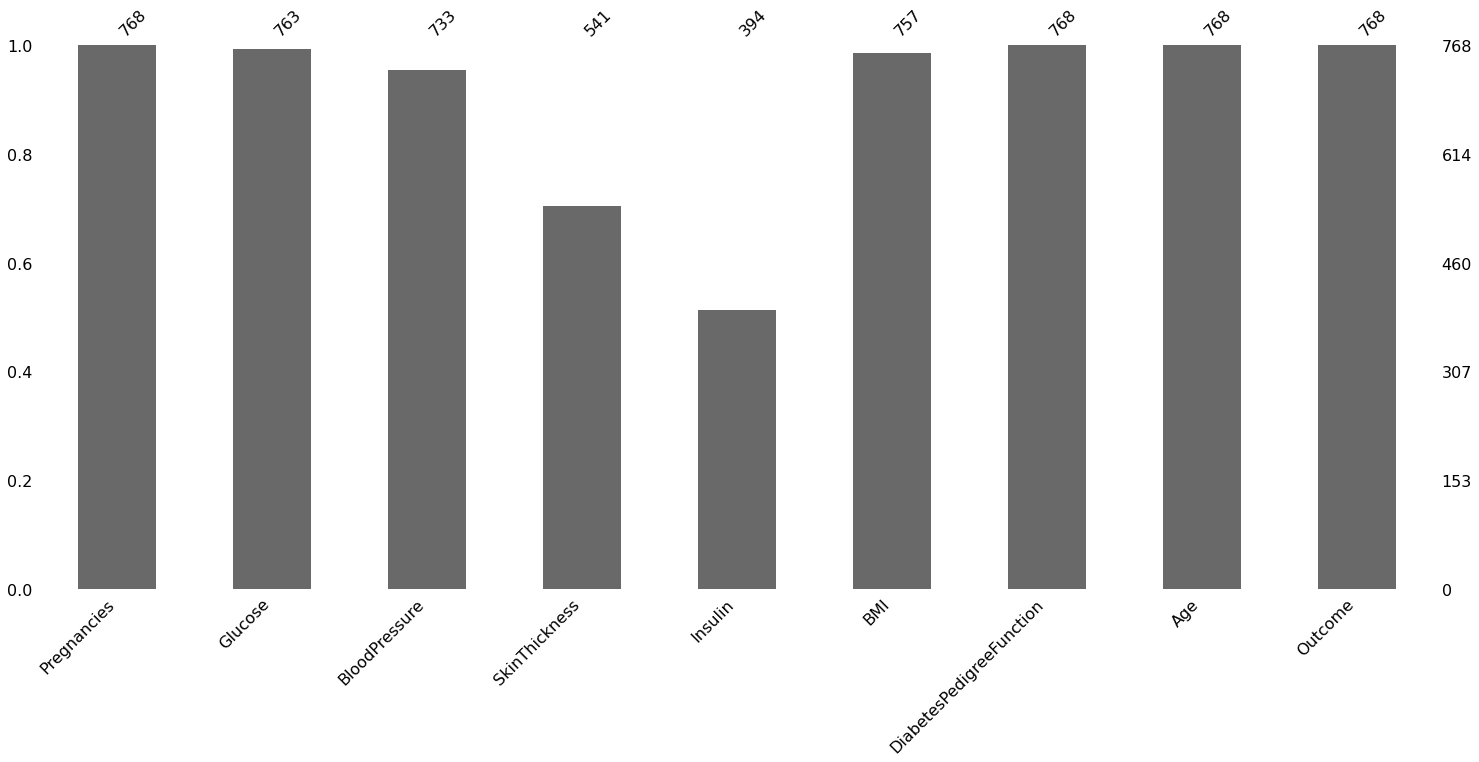

In [34]:
msno.bar(db);

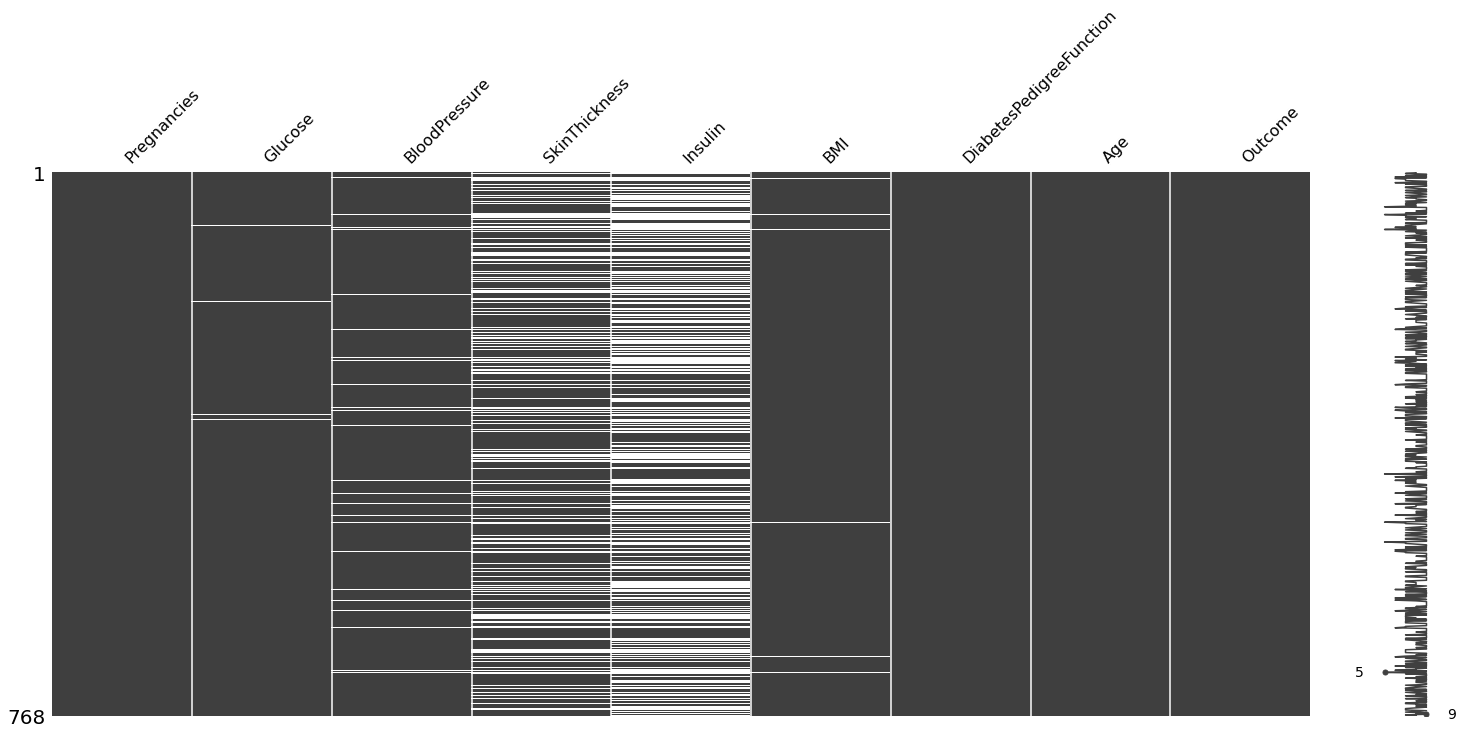

In [32]:
msno.matrix(db);
#msno.matrix(db.sort_values(by="Insulin"))

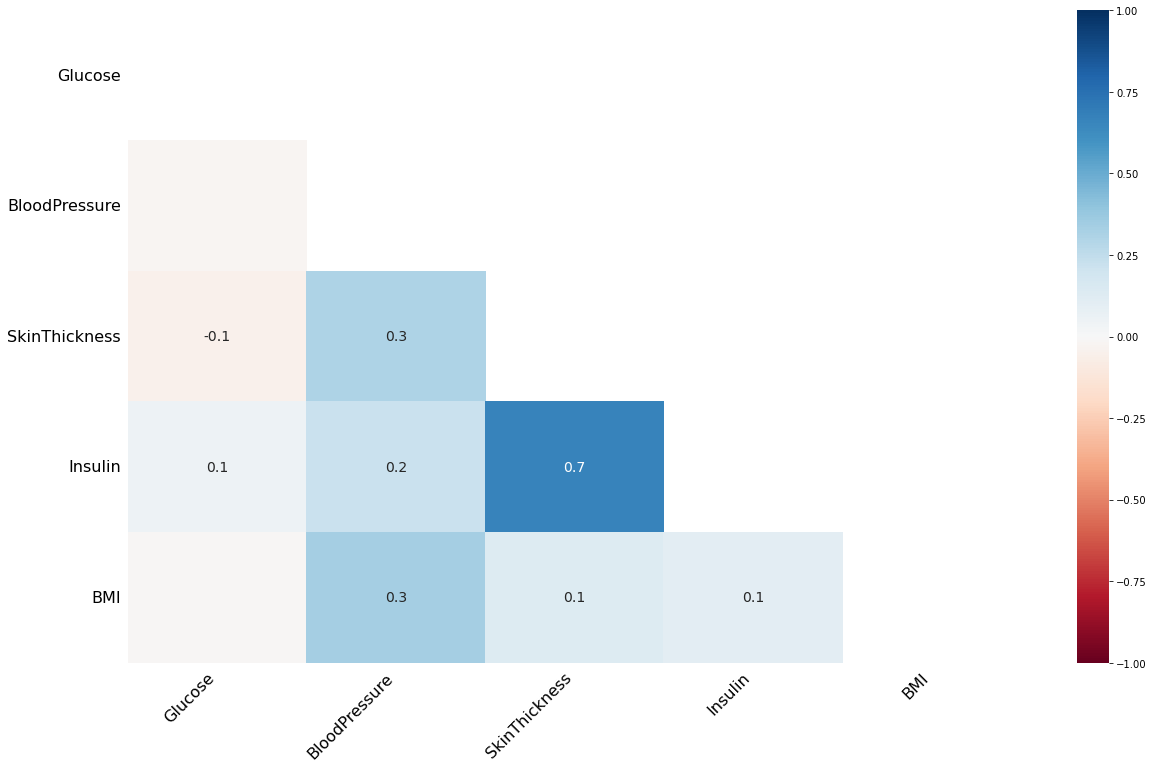

In [33]:
msno.heatmap(db);

We can see heavy correlation between SkinThickness and Insulin of  "0.7"

In [36]:
# drop rows having missing values for Glucose or BMI
db.dropna(subset=['Glucose','BMI'],inplace=True)

Using knnimputer we will fill the remaining missing values without impacting the variability of the dataset.

In [37]:
from sklearn.impute import KNNImputer

In [39]:
db_knn=db.copy()

imputer=KNNImputer(n_neighbors=9)

db_knn.iloc[:]=imputer.fit_transform(db_knn)

In [42]:
# Checking to see if there are any null values left
db_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
db_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.371454,29.133422,154.426123,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.206845,9.306928,96.569879,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.055556,137.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,192.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outlier removal

In [47]:
clean_db = db_knn

<AxesSubplot:xlabel='Pregnancies'>

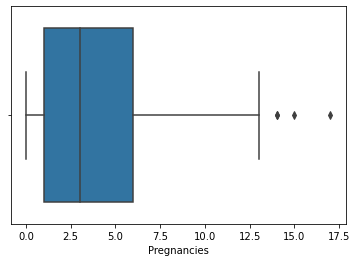

In [46]:
sns.boxplot(data=db_knn,x='Pregnancies')

Values above 13 is an outlier

In [48]:
clean_db=clean_db[clean_db['Pregnancies']<=13]

<AxesSubplot:xlabel='Glucose'>

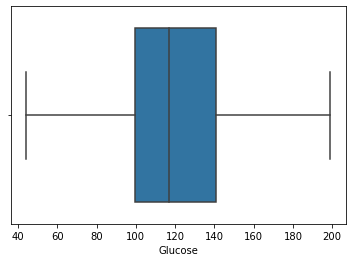

In [53]:
sns.boxplot(data=db_knn,x='Glucose')

The data is distribted normally, there is no outlier

<AxesSubplot:xlabel='BloodPressure'>

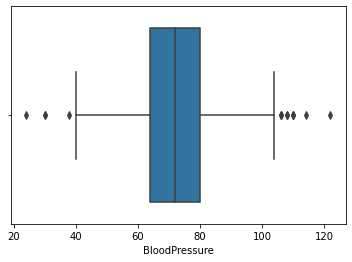

In [58]:
sns.boxplot(data=db_knn,x='BloodPressure')

Values below 30 and above 110 are outliers

In [55]:
clean_db=clean_db[clean_db['BloodPressure']>=30]
clean_db=clean_db[clean_db['BloodPressure']<=110]

<AxesSubplot:xlabel='SkinThickness'>

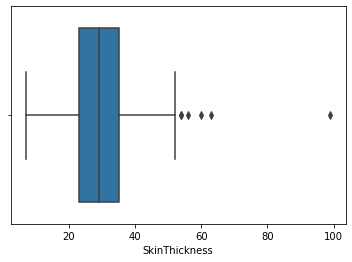

In [56]:
sns.boxplot(data=db_knn,x='SkinThickness')

Values above 70 are outliers

In [57]:
clean_db=clean_db[clean_db['SkinThickness']<=70]

<AxesSubplot:xlabel='Insulin'>

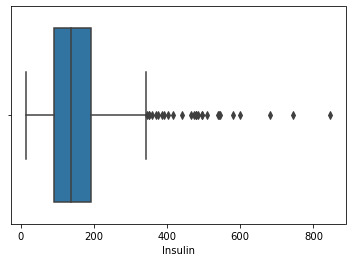

In [59]:
sns.boxplot(data=db_knn,x='Insulin')

Values above 500 are Outliers

In [60]:
clean_db=clean_db[clean_db['Insulin']<=500]

<AxesSubplot:xlabel='Age'>

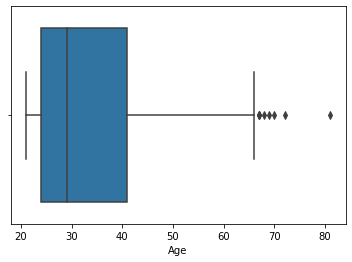

In [61]:
sns.boxplot(data=db_knn,x='Age')

Values above 75 are outliers

In [62]:
clean_db=clean_db[clean_db['Age']<=75]

## Feature Engineering

In [64]:
# Adding a column for the different BMI ranges

#define bins 
bins = [0, 18.5, 24.9, 29.9, 67.1]

#name of groups
groups = ['Underweight', 'NormalWeight', 'OverWeight', 'Obese']

#A=
clean_db['BMI_Categories'] = pd.cut(clean_db['BMI'], bins=bins, labels=groups)


In [80]:
# # Adding a column for the different Glucose level

# #define bins 
# bins = [0, 100.0, 125.0, 199.0]

# #name of groups
# groups = ['Normal', 'Prediabetes', 'Diabetes']

# #A=
# clean_db['Glucose_Categories'] = pd.cut(clean_db['BMI'], bins=bins, labels=groups)

## Exploratory Data Analysis (EDA)

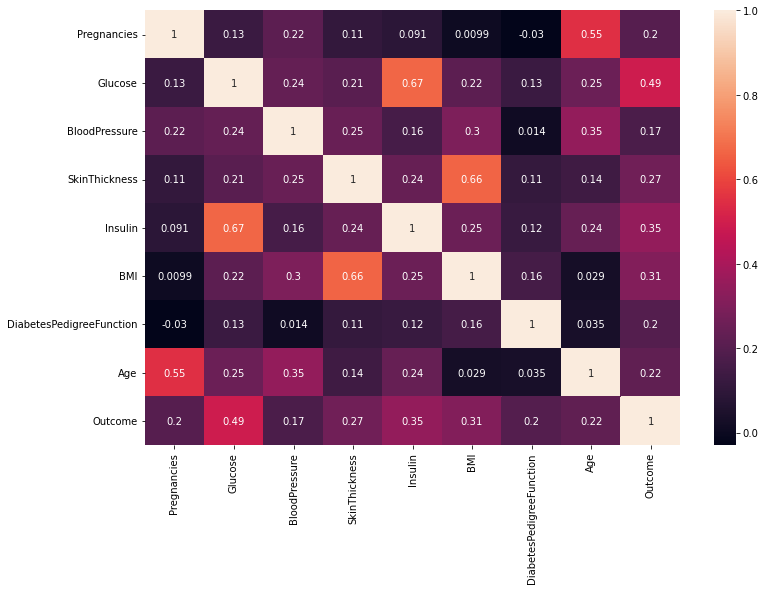

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(clean_db.corr(),annot=True);

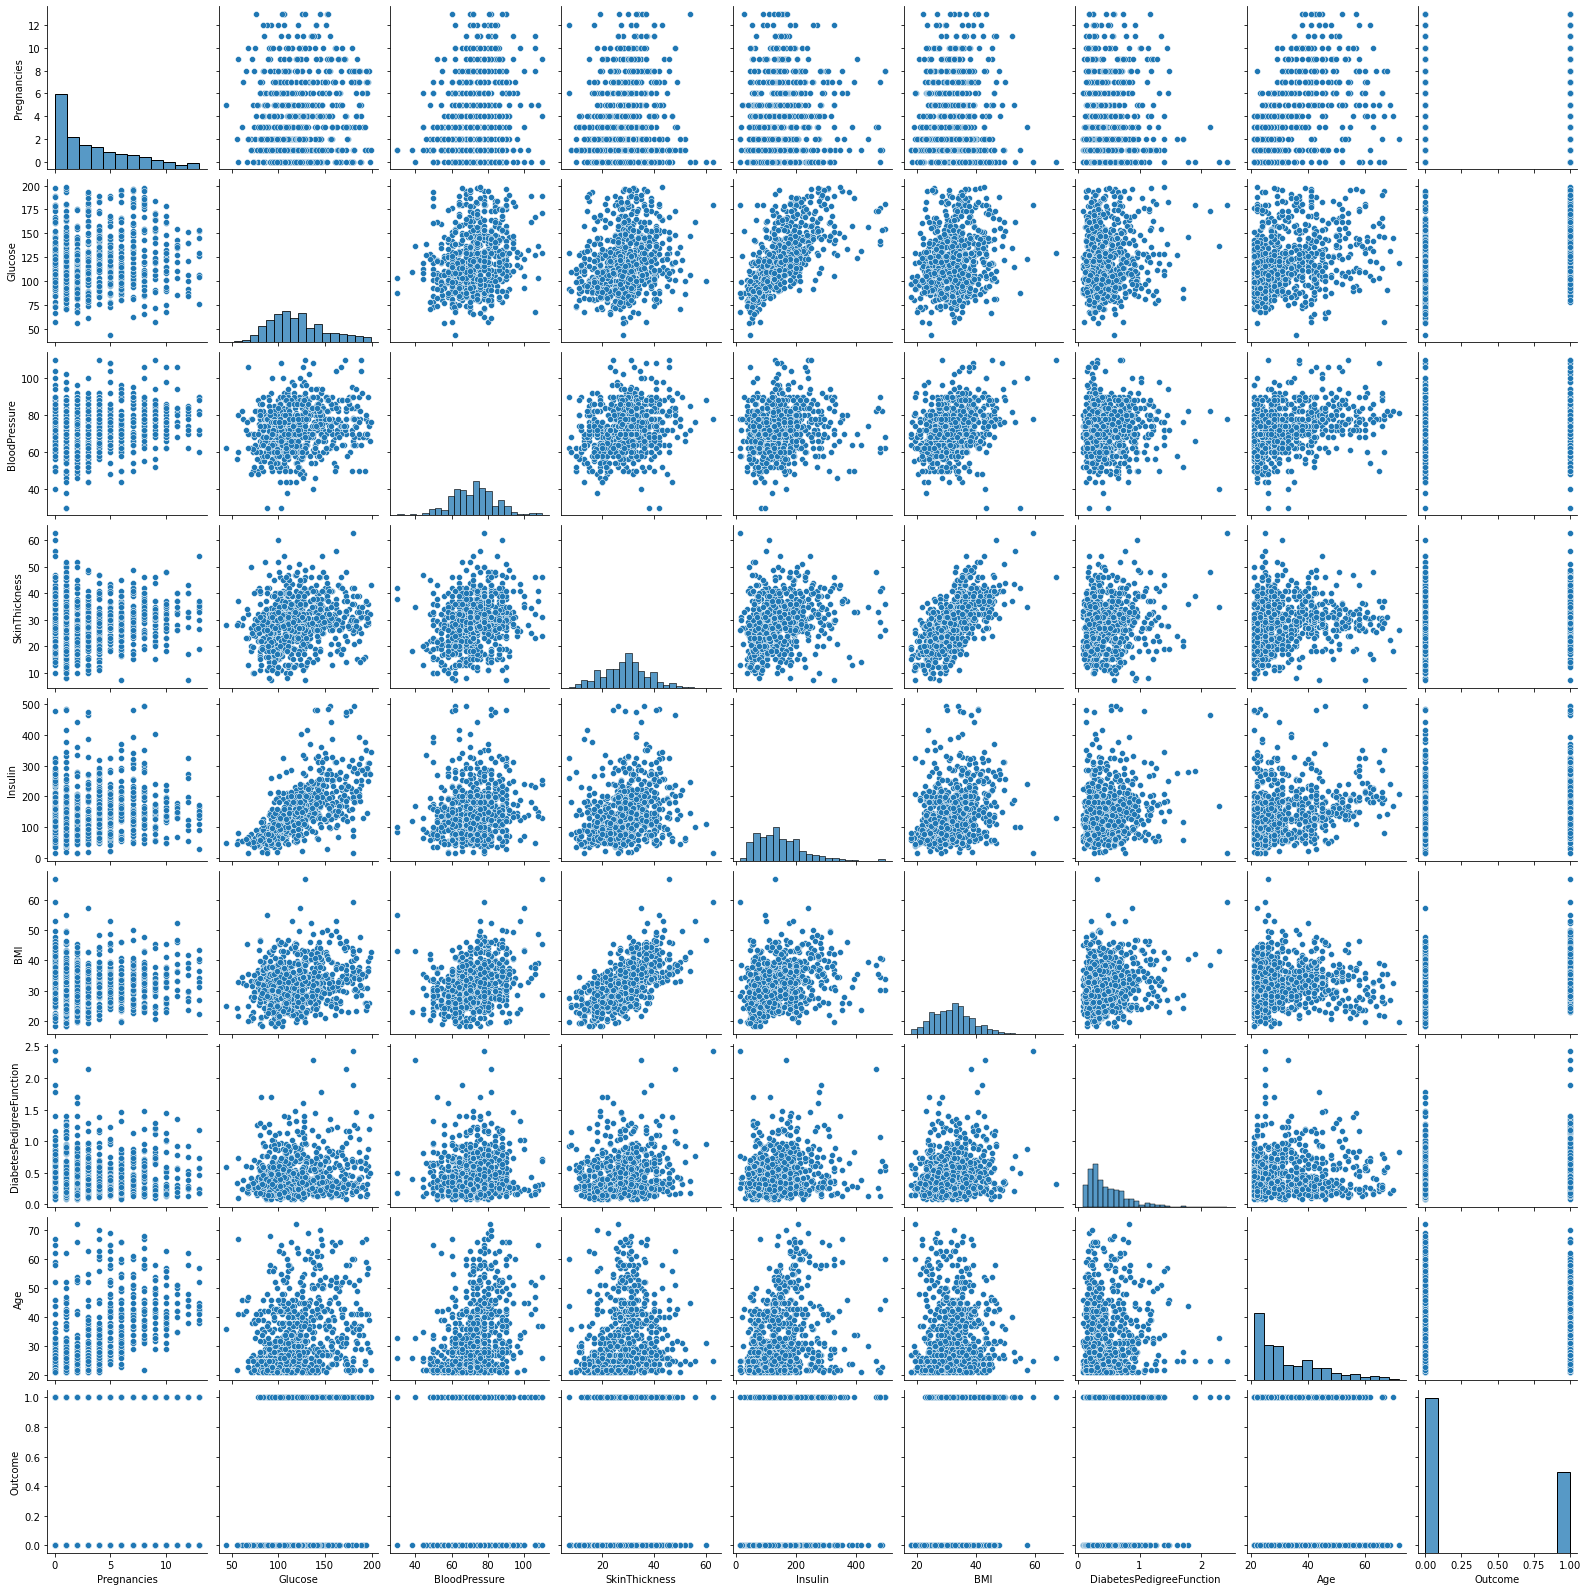

In [93]:
sns.pairplot(clean_db);

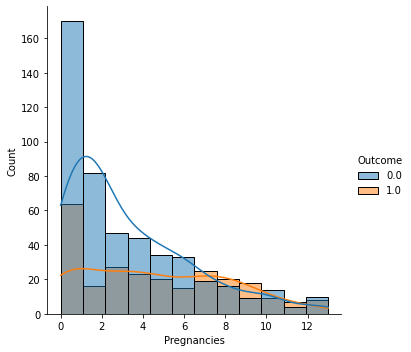

In [96]:
sns.displot(data=clean_db,x='Pregnancies',hue='Outcome',kde=True);

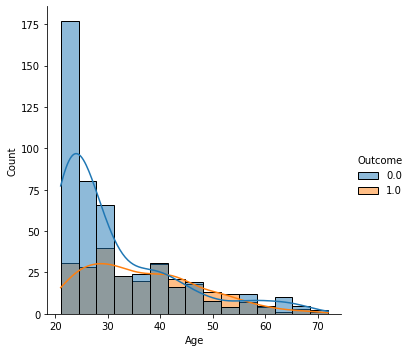

In [98]:
sns.displot(data=clean_db,x='Age',hue='Outcome',kde=True);

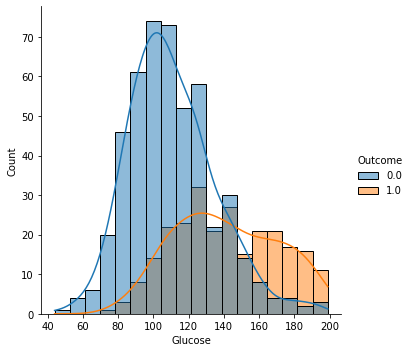

In [99]:
sns.displot(data=clean_db,x='Glucose',hue='Outcome',kde=True);

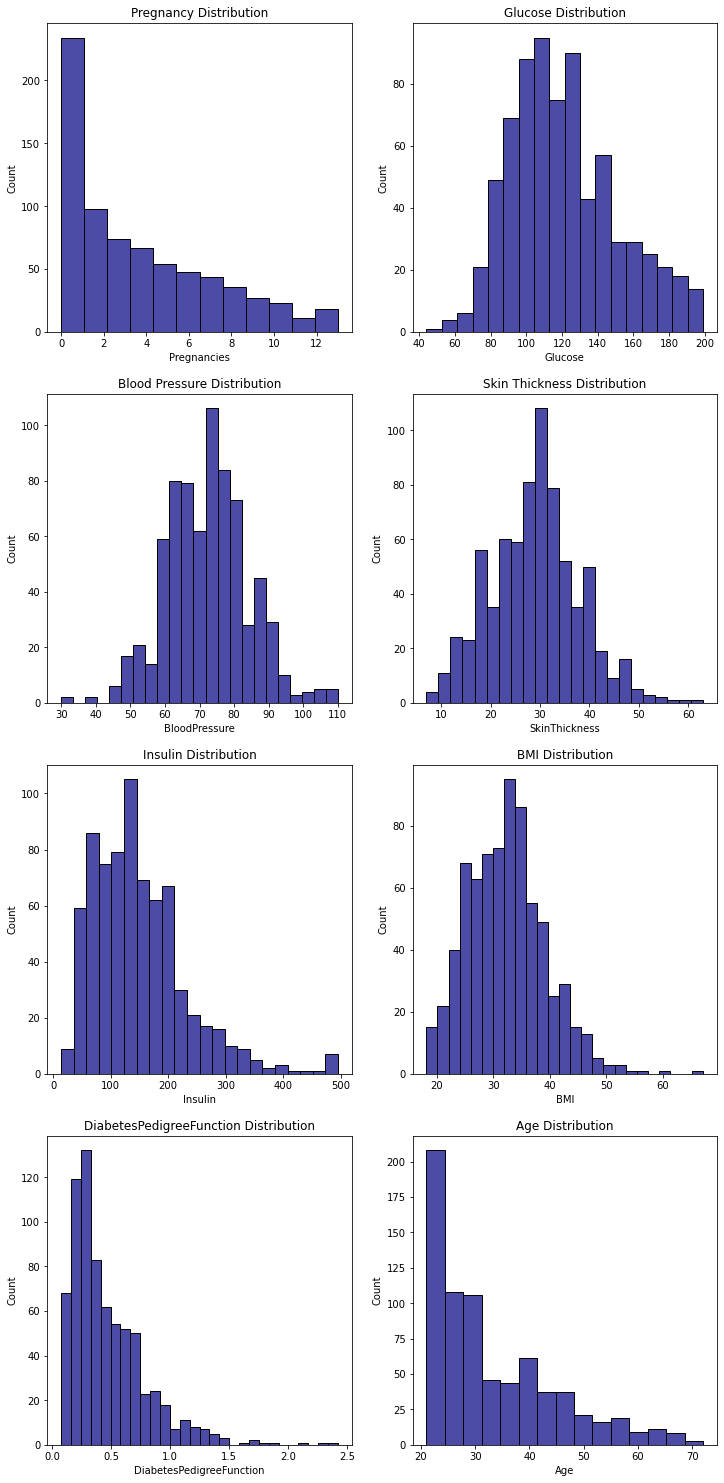

In [106]:
#define plotting region (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(12,10))

  
    
# Adjust subplots so that titles don't overlap
fig.subplots_adjust( top = 2.1 )

    # Title for the complete figure
#fig.suptitle("Data Distribution" , fontsize = 'x-large' , fontweight = 'bold' )

#The alpha parameter controls the opacity of the bars. The value can be set to any value from 0 to 1.

#Pregnancy distribution
sns.histplot( clean_db['Pregnancies'] , color="navy", alpha= 0.7, ax=axes[0,0]).set(title='Pregnancy Distribution')
#Glucose distribution
sns.histplot( clean_db['Glucose'] , color="navy", alpha= 0.7, ax=axes[0,1]).set(title='Glucose Distribution')
#BloodPressure distribution
sns.histplot( clean_db['BloodPressure'] , color="navy", alpha= 0.7, ax=axes[1,0]).set(title='Blood Pressure Distribution')
#SkinThickness distribution
sns.histplot( clean_db['SkinThickness'] , color="navy", alpha= 0.7, ax=axes[1,1]).set(title='Skin Thickness Distribution')
#Insulin distribution
sns.histplot( clean_db['Insulin'] , color="navy", alpha= 0.7, ax=axes[2,0]).set(title='Insulin Distribution')
#BMI distribution
sns.histplot( clean_db['BMI'] , color="navy", alpha= 0.7, ax=axes[2,1]).set(title='BMI Distribution')
#DiabetesPedigreeFunction
sns.histplot( clean_db['DiabetesPedigreeFunction'] , color="navy", alpha= 0.7, ax=axes[3,0]).set(title='DiabetesPedigreeFunction Distribution')
#Age distribution
sns.histplot( clean_db['Age'] , color="navy", alpha= 0.7, ax=axes[3,1]).set(title='Age Distribution');